In [1]:
import numpy as np
import matplotlib.pyplot as plt
X = np.random.normal(1,1,1000)
y = X * 2 + 3 + np.random.normal(size=1000)

print(X.shape , y.shape)

(1000,) (1000,)


In [2]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2)

## 一切就绪，就差一个线性回归模型了

In [3]:
class SimpleLinearRegression:

    def __init__(self):
        """初始化Simple Linear Regression模型"""
        self.a_ = None
        self.b_ = None

    def fit(self, x_train, y_train):
        """根据训练数据集x_train,y_train训练Simple Linear Regression模型"""
        assert x_train.ndim == 1, \
            "Simple Linear Regressor can only solve single feature training data."
        assert len(x_train) == len(y_train), \
            "the size of x_train must be equal to the size of y_train"

        x_mean = np.mean(x_train)
        y_mean = np.mean(y_train)

        self.a_ = (x_train - x_mean).dot(y_train - y_mean) / (x_train - x_mean).dot(x_train - x_mean)
        self.b_ = y_mean - self.a_ * x_mean

        return self

    def predict(self, x_predict):
        """给定待预测数据集x_predict，返回表示x_predict的结果向量"""
        assert x_predict.ndim == 1, \
            "Simple Linear Regressor can only solve single feature training data."
        assert self.a_ is not None and self.b_ is not None, \
            "must fit before predict!"

        return np.array([self._predict(x) for x in x_predict])

    def _predict(self, x_single):
        """给定单个待预测数据x_single，返回x_single的预测结果值"""
        return self.a_ * x_single + self.b_

    def score(self, x_test, y_test):
        """根据测试数据集 x_test 和 y_test 确定当前模型的准确度 r2_score"""

        y_predict = self.predict(x_test)
        return 1 - (np.sum((y_test - y_predict)**2) / len(y_test)) / np.var(y_test)

In [4]:
SLR =  SimpleLinearRegression()
SLR.fit(X_train , y_train)
SLR.score(X_test , y_test)

0.7657723523406184

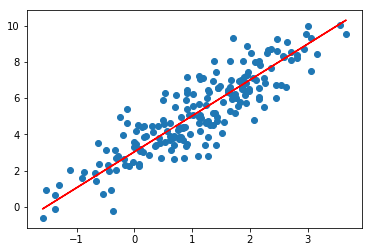

In [5]:
plt.scatter(X_test , y_test)
plt.plot(X_test , SLR.predict(X_test) , color = 'r')

# 实际项目中，特征数几乎很少是一维的，所以这个模型其实并不是实用，接下来我们实现一个多元线性回归模型